In [1]:
import sqlite3
import networkx as nx
import json
from collections import defaultdict

In [2]:
# Подключаемся к базе данных
conn = sqlite3.connect('legal_cases.db')
cursor = conn.cursor()

# Выбираем нужные колонки из таблицы
cursor.execute("SELECT id, Законы FROM collection")
data = cursor.fetchall()

# Закрываем соединение с базой
conn.close()

In [20]:

case_laws = {}
for case_id, laws_str in data:
    try:
        laws_dict = json.loads(laws_str)
        articles = set()
        for key, values in laws_dict.items():
            articles.update(values)
        if len(articles) != 0:
            case_laws[case_id] = articles
    except json.JSONDecodeError:
        continue
G = nx.Graph()

for case_id in case_laws:
    G.add_node(case_id)

for id1, articles1 in case_laws.items():
    for id2, articles2 in case_laws.items():
        if id1 != id2 and articles1.intersection(articles2):
            G.add_edge(id1, id2)

print(f"Количество вершин в графе: {G.number_of_nodes()}")
print(f"Количество рёбер в графе: {G.number_of_edges()}")


Количество вершин в графе: 1895
Количество рёбер в графе: 1150333


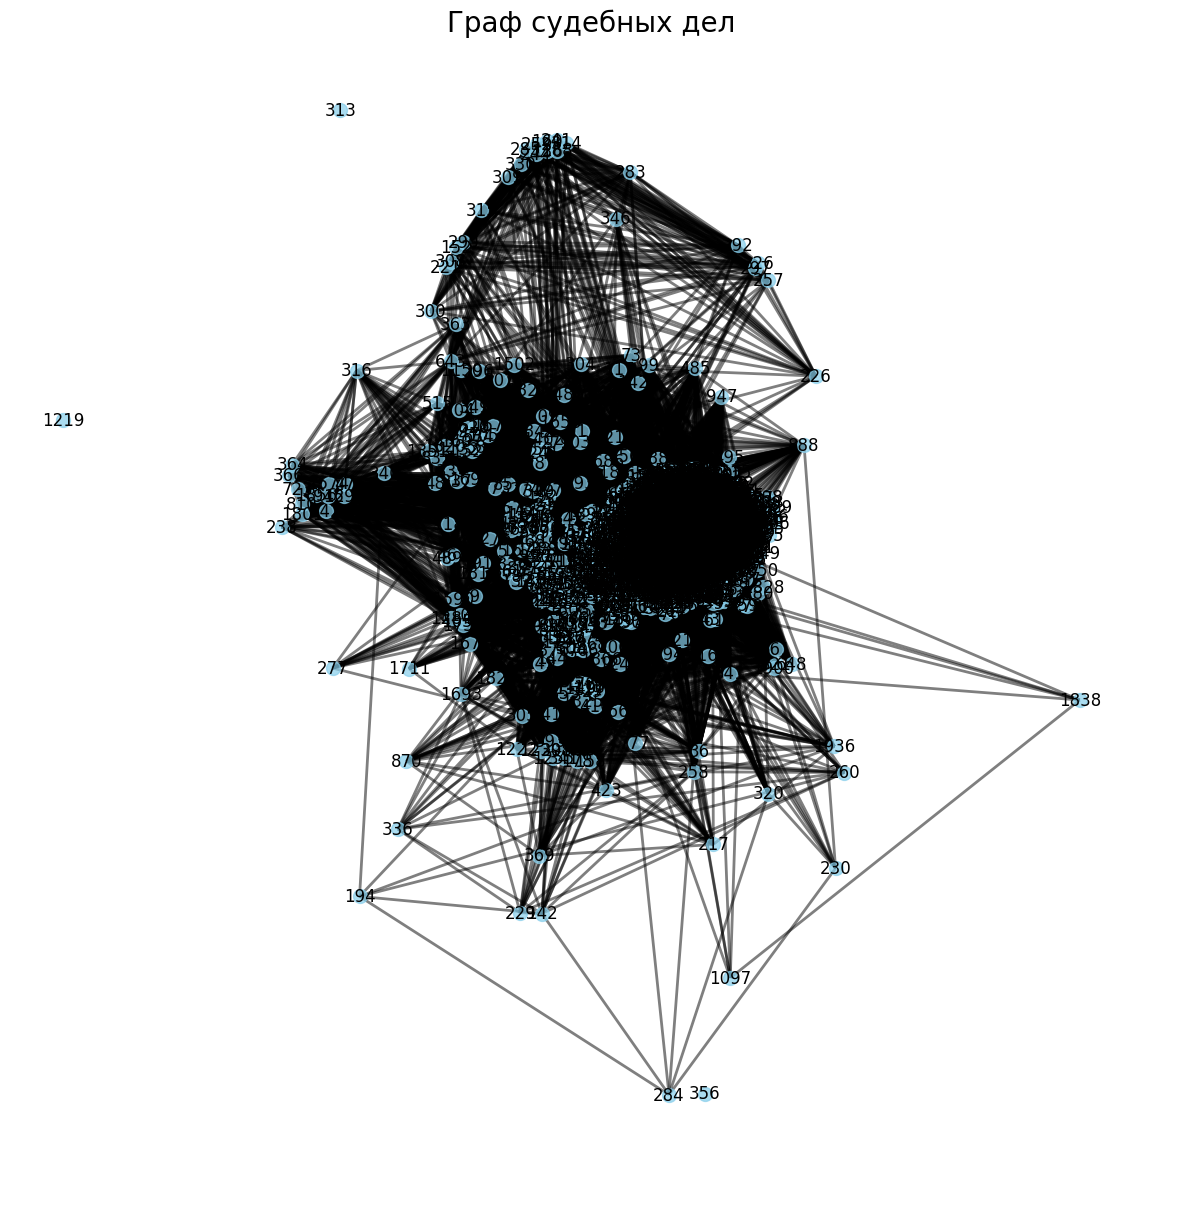

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

# Предположим, что 'G' уже содержит ваш граф

# Устанавливаем размер фигуры
plt.figure(figsize=(15, 15))

# Создаем расположение узлов с увеличенным масштабом
pos = nx.spring_layout(G, scale=5, k=0.3)  # 'k' - параметр, отталкивающий узлы друг от друга

# Рисуем узлы
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='skyblue', alpha=0.7)

# Рисуем ребра
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5)

# Рисуем метки узлов с увеличенным шрифтом
nx.draw_networkx_labels(G, pos, font_size=12)

# Удаляем оси
plt.axis('off')

# Устанавливаем заголовок с увеличенным размером шрифта
plt.title('Граф судебных дел', fontsize=20)

# Показываем граф
plt.show()
